## Numerical computation using Numpy

### The Newton Raphson root finding method

Find the square root of 7 by numerically solving the equation: $x^2 - 7 = 0$

Let's assume that there is a function, $f(x) = x^2 - 7$

Now, we need to find the roots of this function $f(x)$, that is the values of $x : f(x) = 0$, which will give us the value $x = \sqrt{7}$

Let's begin with an initial guess, $x_1$ as the root of $f(x)$

The slope of the tangent to $f(x)$ at $x_1$ is: 

$$ f'(x_1) =  \frac{f(x_2) - f(x_1)}{(x_2 - x_1)}$$

To find the intercept of this slope on the X axis, we input $f(x_2) = 0$ in the above equation to obtain:

$$ x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}$$

We repeat this operation iteratively, and the method converges towards the root of the function.

An illustration from the Wikipedia page on the [Newton's method](https://en.wikipedia.org/wiki/Newton's_method).

<img src=https://upload.wikimedia.org/wikipedia/commons/e/e0/NewtonIteration_Ani.gif>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

We begin by defining the number line

In [12]:
N = 20 # number of divisions, increase this to increase the resolution of your number line
x = np.linspace(-5, 5, N)

In [3]:
f = x**2 - 7

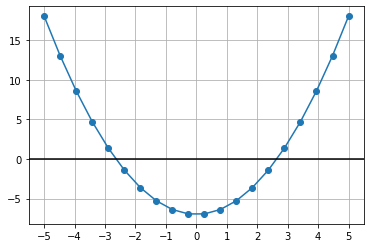

In [4]:
plt.plot(x, f, marker="o")
plt.axhline(0, color="k")

plt.xticks(np.arange(-5,5.1,1))
plt.grid()

Visually, we see that the function intersects the X axis close to $x = 2.6$

In [91]:
2.6475**2

7.00925625

We got quite close the the square root of 7 there

Let's find out the index of the array f where $|f(x)|$ has the least value

In [105]:
i_root = np.argmin(np.abs(f))
print(f[i_root])

1.37950138504155


We are not close to Zero unfortunately, 1.379 is the lowest value.

In [97]:
x[i_root]

-2.7777777777777777

In [98]:
x[i_root]**2

7.716049382716049

We got close to the answer, try the above method by increasing the resolution along the number line and see if the solution get's any better!

A traditional way of computing the root would involve loops (which is usually a bad idea in Python). But in this case, we are lucky that there aren't too many steps to reach the answer and we are not looping over large arrays.

In [5]:
x_n = -4
count = 0
while count < 5:
    f_n = x_n**2 - 7
    f_n_dx = 2*x_n # f'(x) = 2x
    
    x_np1 = x_n - f_n/f_n_dx
    
    print(count, x_n, x_np1)
    x_n = x_np1
    count += 1
print(x_np1)    

0 -4 -2.875
1 -2.875 -2.654891304347826
2 -2.654891304347826 -2.6457670441902894
3 -2.6457670441902894 -2.6457513111113693
4 -2.6457513111113693 -2.6457513110645907
-2.6457513110645907


But fear not, there are optimization functions available from scipy! See more advanced [optimization functions here](https://docs.scipy.org/doc/scipy/reference/optimize.html). These functions are more efficient than using loops in pure Python.

In [2]:
from scipy import optimize

In [3]:
def myfunc(x):
    return x**2 - 7

In [6]:
root = optimize.newton(myfunc, 1.5)

In [7]:
root

2.6457513110645907

In [8]:
root = optimize.newton(myfunc, -1.5)

In [9]:
root

-2.6457513110645907

# Optimization: Iterative solvers

## Exercise: Iteratively solve the water wave dispersion relationship

$$ \omega^2 = gk \tanh(kh) $$

Where $\omega = \frac{2 \pi}{T}$ is the wave frequency (in radians per second) and $T = 10$s is the time period (s), $g = 9.81 \textrm{ms}^{-2}$ is the acceleration due to gravity, $k = \frac{2 \pi}{L}$ is the wave number with $L$ being the wavelength (m), $h = 10$m is the height of the water column.

Write a solver using loops where:
$$ k_{n+1} = \frac{\omega^2}{g \tanh(k_n h)}$$

Then try solving the same with an optimization function in scipy, optimizing values of k for the function:

$$ \omega^2 - gk \tanh (kh)$$

In [84]:
# %load ./solutions/sol_dispersion.py

In [85]:
# %load ./solutions/sol_disp_scipy.py